In [2]:
"""

This notebook contains exploratory data analysis for the hotels_and_POIs table (df_hotels_POIs)

"""

'\n\nThis notebook contains exploratory data analysis for the hotels_and_POIs table (df_hotels_POIs)\n\n'

In [3]:
# Import and install libraries 

# Install xgboost
!pip install xgboost

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Models
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

# Metrics
from sklearn.metrics import r2_score

In [4]:
# Load Data

df_hotels_POIs = pd.read_csv('hotels_and_POIs.csv')
# df_hotels_POIs.set_index('hotel_id', inplace=True)
df_hotels_POIs.head()

,hotel_id,hotel_name,hotel_review_count,hotel_categories,hotel_rating,hotel_price,hotel_distance,hotel_latitude,hotel_longitude,hotel_address1,hotel_city,hotel_zip_code,hotel_country,hotel_state,hotel_display_address,mean_poi_price,mean_poi_rating,mean_poi_review_count,count_poi
0,yeesT9W64tpVq5Gcae18Sg,Delta Hotels by Marriott Toronto,161,hotels,4.0,2,3623.820220,43.643069,-79.383865,75 Lower Simcoe Street,Toronto,M5J 3A6,CA,ON,"['75 Lower Simcoe Street', 'Toronto, ON M5J 3A...",1.800000,2.766667,58.133333,15
1,kKnGY0Xj7dG4ubjrbygynw,Residence Inn by Marriott Toronto Downtown,95,hotels,4.0,2,3320.732218,43.644790,-79.390530,255 Wellington Street W,Toronto,M5V 3P9,CA,ON,"['255 Wellington Street W', 'Toronto, ON M5V 3...",1.750000,2.925926,53.111111,27
2,XHrPQKUTJXJGPH9etKUYUw,Courtyard by Marriott Toronto Downtown,152,hotels,3.0,2,1718.071430,43.662410,-79.383149,475 Yonge Street,Toronto,M4Y 1X7,CA,ON,"['475 Yonge Street', 'Toronto, ON M4Y 1X7', 'C...",1.666667,3.060000,71.360000,25
3,zYRBRfYuq_6x-wNKa8NqrA,Le Germain Hotel,55,hotels,4.5,3,3202.097393,43.645751,-79.391025,30 Mercer Street,Toronto,M5V 1H3,CA,ON,"['30 Mercer Street', 'Toronto, ON M5V 1H3', 'C...",2.238095,2.955882,96.558824,34
4,PCkJAv7WQJ08C1RA6ilqWA,1 Hotel Toronto,5,hotels,5.0,2,3517.449544,43.642826,-79.401439,550 Wellington Street W,Toronto,M5V 2V4,CA,ON,"['550 Wellington Street W', 'Toronto, ON M5V 2...",2.125000,2.772727,41.545455,22


In [5]:
# Viewing the shape of the dataframe
df_hotels_POIs.shape


(200, 19)

In [6]:
# Getting Information about the dataset to confirm firm number of null values and data types

df_hotels_POIs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   hotel_id               200 non-null    object 
 1   hotel_name             200 non-null    object 
 2   hotel_review_count     200 non-null    int64  
 3   hotel_categories       200 non-null    object 
 4   hotel_rating           200 non-null    float64
 5   hotel_price            200 non-null    int64  
 6   hotel_distance         200 non-null    float64
 7   hotel_latitude         200 non-null    float64
 8   hotel_longitude        200 non-null    float64
 9   hotel_address1         199 non-null    object 
 10  hotel_city             200 non-null    object 
 11  hotel_zip_code         198 non-null    object 
 12  hotel_country          200 non-null    object 
 13  hotel_state            200 non-null    object 
 14  hotel_display_address  200 non-null    object 
 15  mean_p

In [7]:
# Generate descriptive statistics for each numeric feature
df_hotels_POIs.describe()

,hotel_review_count,hotel_rating,hotel_price,hotel_distance,hotel_latitude,hotel_longitude,mean_poi_price,mean_poi_rating,mean_poi_review_count,count_poi
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,37.390000,3.085000,2.160000,7201.187792,43.677119,-79.429909,1.965706,3.122991,58.347127,13.560000
std,60.164581,1.022498,0.543948,6525.626332,0.053112,0.090160,0.366466,0.594833,48.099162,13.414026
min,1.000000,1.000000,1.000000,247.153531,43.418360,-79.752840,1.000000,0.000000,0.000000,0.000000
25%,4.750000,2.500000,2.000000,2428.790086,43.649120,-79.492935,1.800000,2.875000,24.204327,2.000000
50%,12.000000,3.000000,2.000000,3458.521877,43.660370,-79.393205,1.965706,3.122991,52.828283,9.000000
75%,40.000000,4.000000,2.000000,13915.531221,43.690090,-79.380154,2.000000,3.476042,71.941667,23.000000
max,423.000000,5.000000,4.000000,40434.031466,43.821713,-79.197260,4.000000,4.500000,294.333333,40.000000


In [21]:
df_hotels_POIs.columns

Index(['hotel_id', 'hotel_name', 'hotel_review_count', 'hotel_categories',
       'hotel_rating', 'hotel_price', 'hotel_distance', 'hotel_latitude',
       'hotel_longitude', 'hotel_address1', 'hotel_city', 'hotel_zip_code',
       'hotel_country', 'hotel_state', 'hotel_display_address',
       'mean_poi_price', 'mean_poi_rating', 'mean_poi_review_count',
       'count_poi'],
      dtype='object')

In [24]:
df_hotels_POIs_numeric = df_hotels_POIs[['hotel_review_count',
       'hotel_rating', 'hotel_price', 'hotel_distance', 'hotel_latitude',
       'hotel_longitude',
       'mean_poi_price', 'mean_poi_rating', 'mean_poi_review_count',
       'count_poi']]

In [29]:
# Absolute correlation matrix for numeric features in the dataframe
corr_matrix = abs(df_hotels_POIs_numeric.corr())
corr_matrix.style.background_gradient()

,hotel_review_count,hotel_rating,hotel_price,hotel_distance,hotel_latitude,hotel_longitude,mean_poi_price,mean_poi_rating,mean_poi_review_count,count_poi
hotel_review_count,1.000000,0.129175,0.386257,0.212706,0.163729,0.132704,0.019107,0.046446,0.048591,0.396022
hotel_rating,0.129175,1.000000,0.241957,0.155517,0.066779,0.020586,0.002318,0.073822,0.144390,0.276422
hotel_price,0.386257,0.241957,1.000000,0.157607,0.031793,0.086827,0.233582,0.051475,0.047892,0.256252
hotel_distance,0.212706,0.155517,0.157607,1.000000,0.298380,0.643802,0.176394,0.048985,0.162918,0.521521
hotel_latitude,0.163729,0.066779,0.031793,0.298380,1.000000,0.126376,0.129394,0.155221,0.085228,0.335866
hotel_longitude,0.132704,0.020586,0.086827,0.643802,0.126376,1.000000,0.114573,0.053927,0.143295,0.343632
mean_poi_price,0.019107,0.002318,0.233582,0.176394,0.129394,0.114573,1.000000,0.050190,0.268171,0.222865
mean_poi_rating,0.046446,0.073822,0.051475,0.048985,0.155221,0.053927,0.050190,1.000000,0.158038,0.060741
mean_poi_review_count,0.048591,0.144390,0.047892,0.162918,0.085228,0.143295,0.268171,0.158038,1.000000,0.153040
count_poi,0.396022,0.276422,0.256252,0.521521,0.335866,0.343632,0.222865,0.060741,0.153040,1.000000


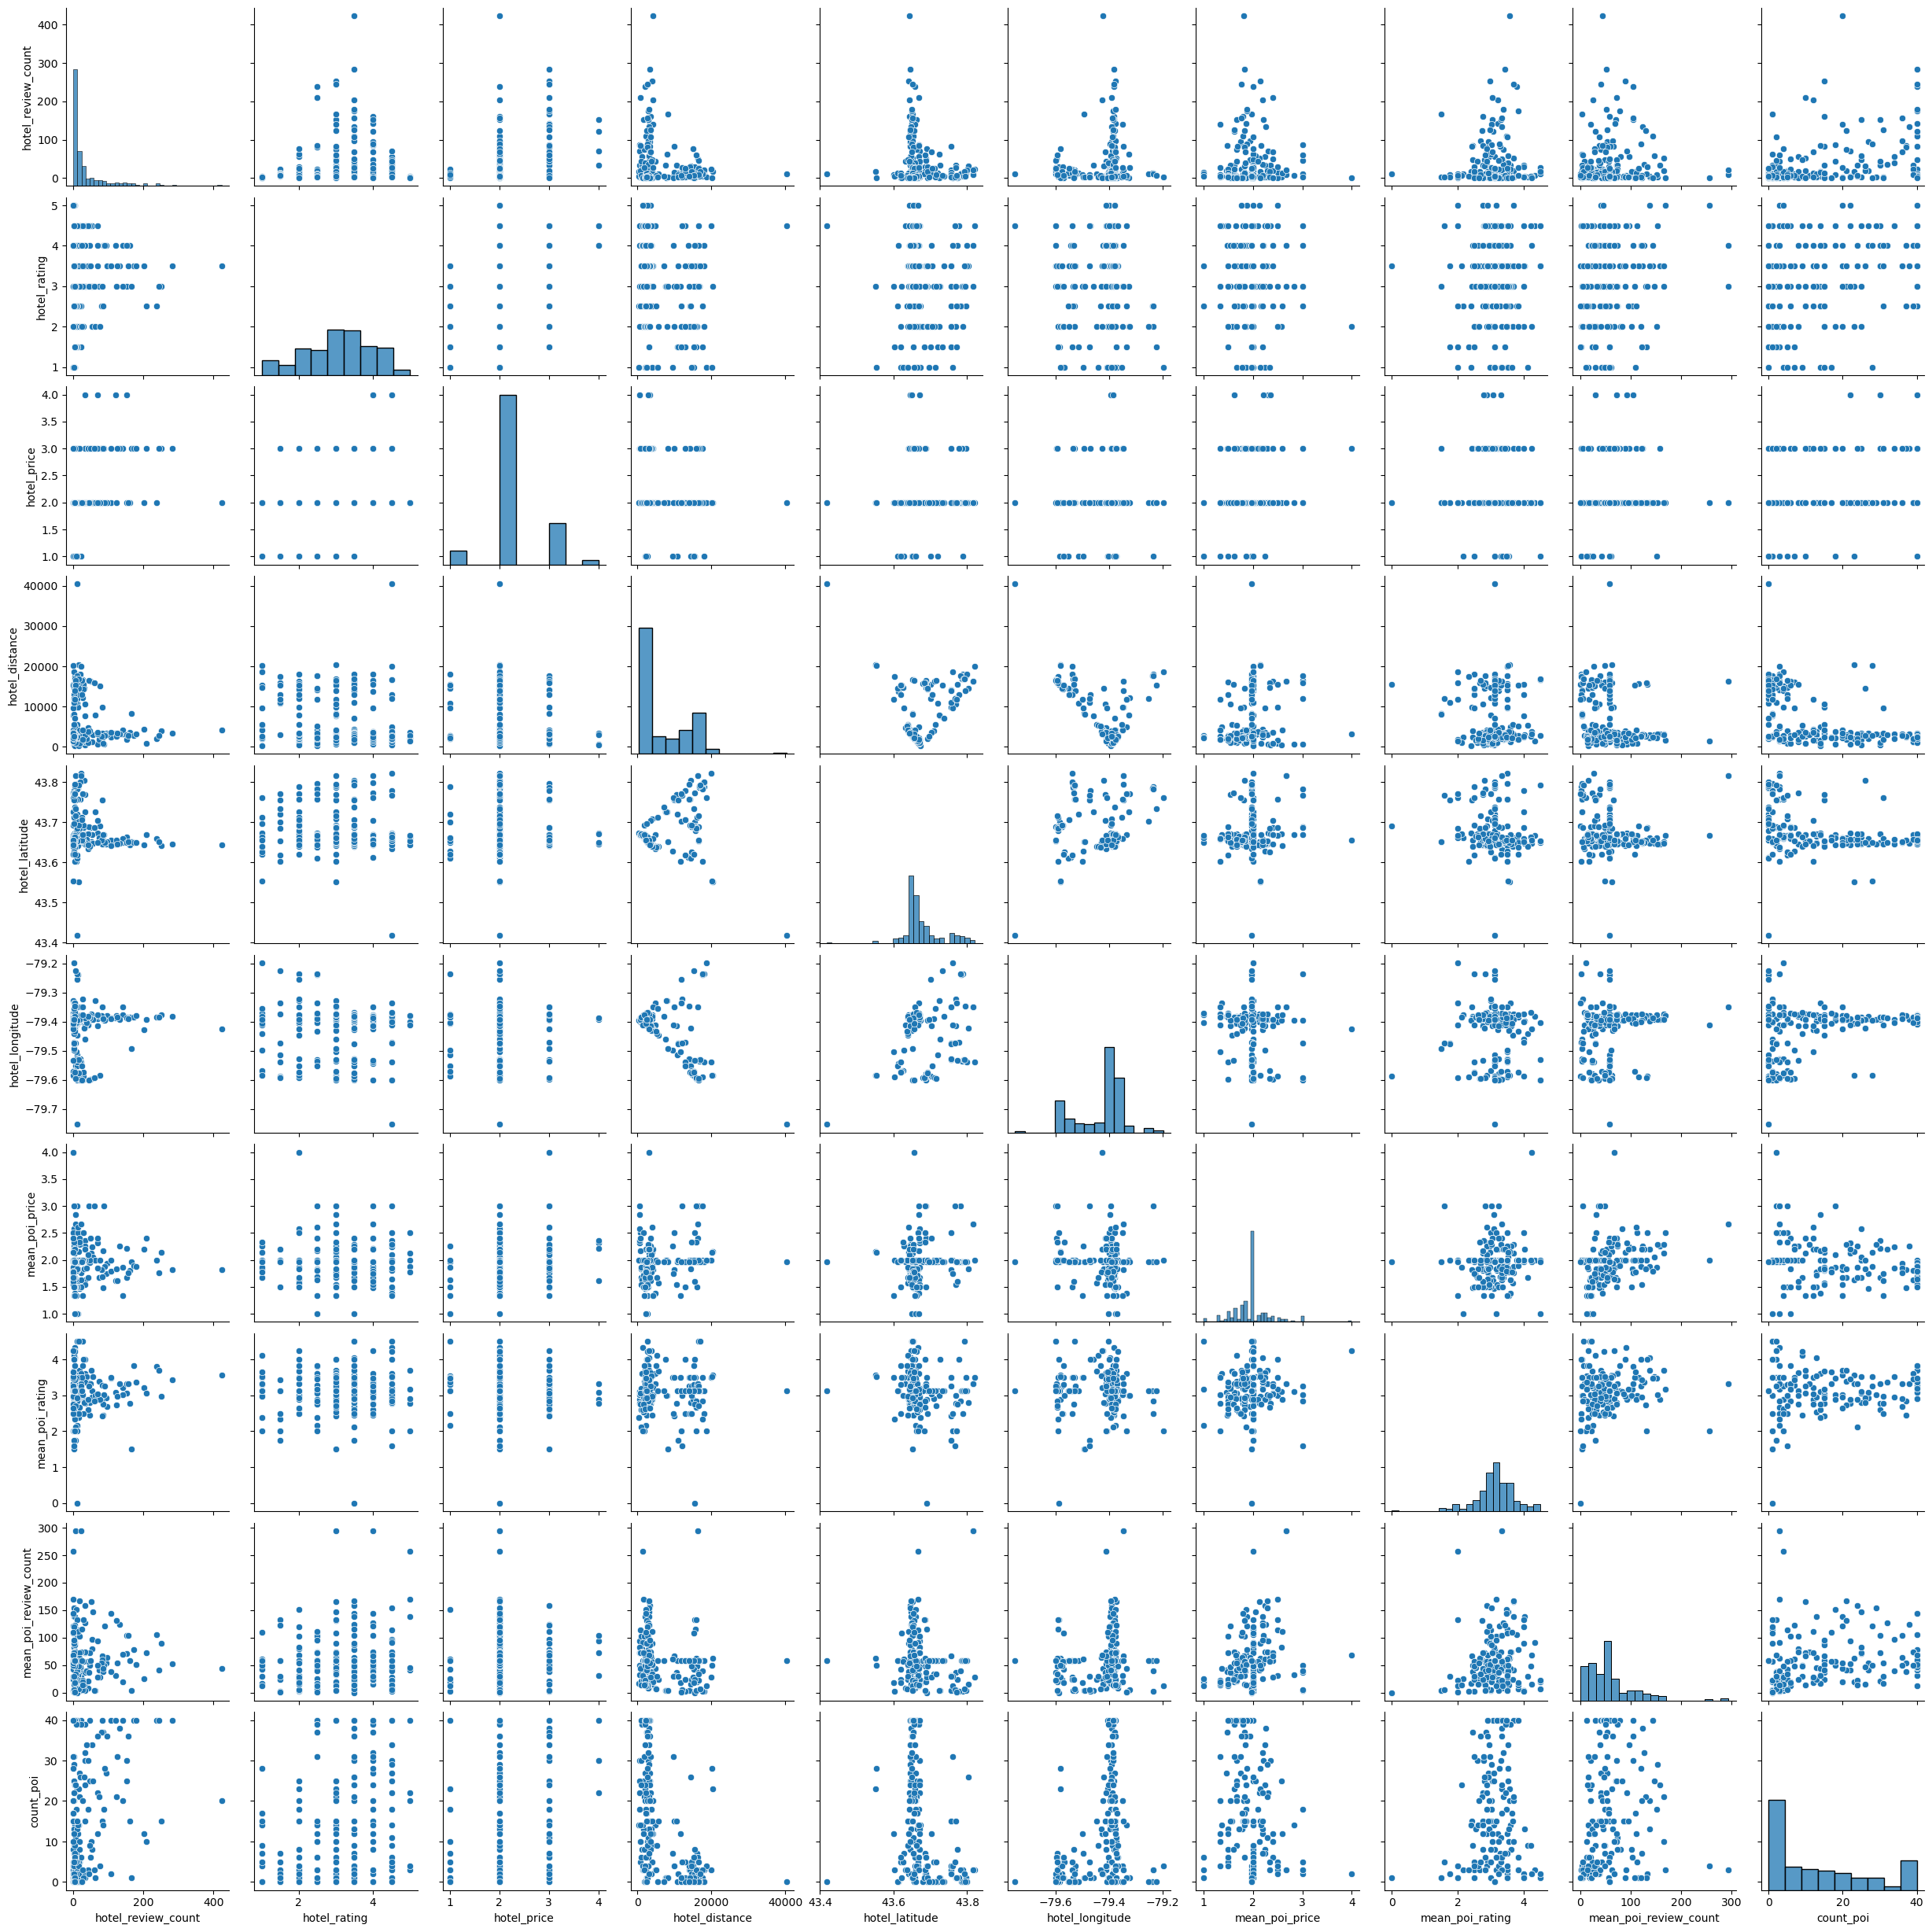

In [30]:
# Correlation plots for each numeric feature
sns.pairplot(data=df_hotels_POIs_numeric)

<Axes: xlabel='hotel_rating', ylabel='Count'>

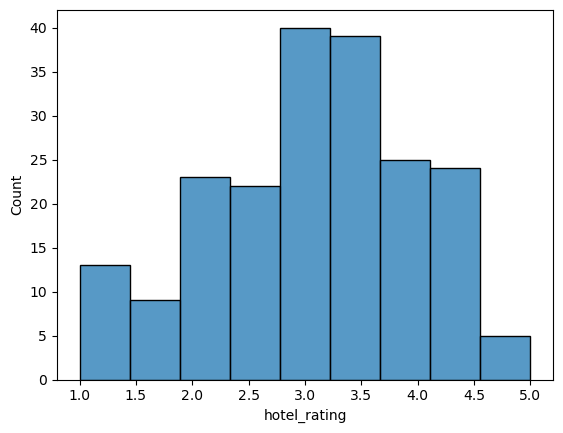

In [8]:
# Histogram to view the distribution of hotel_rating
sns.histplot(df_hotels_POIs['hotel_rating'])

<Axes: xlabel='hotel_price', ylabel='Count'>

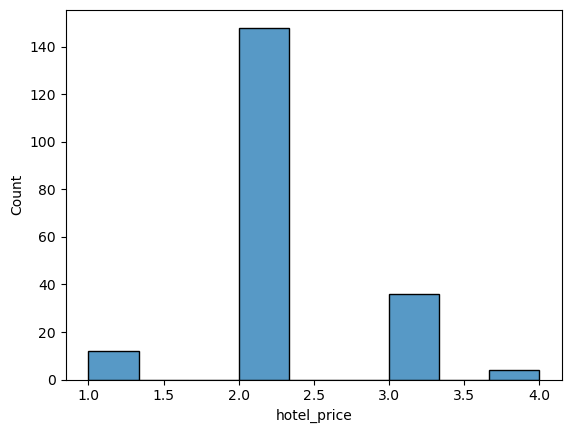

In [31]:
# Histogram to view the distribution of hotel_rating
sns.histplot(df_hotels_POIs['hotel_price'])

<Axes: xlabel='hotel_review_count', ylabel='Count'>

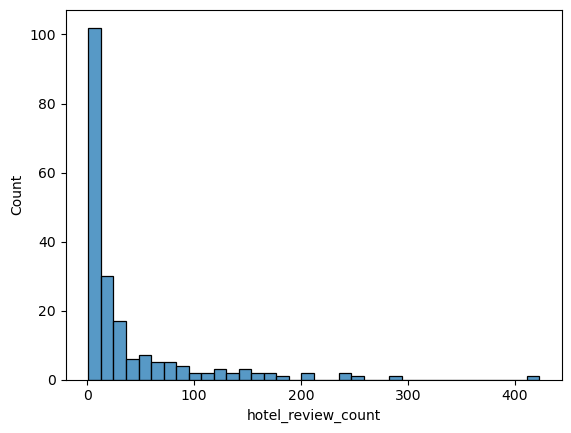

In [32]:
# Histogram to view the distribution of hotel_rating
sns.histplot(df_hotels_POIs['hotel_review_count'])

<Axes: xlabel='hotel_distance', ylabel='Count'>

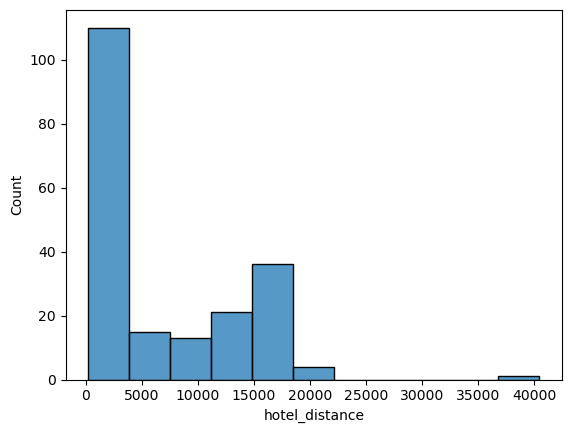

In [33]:
# Histogram to view the distribution of hotel_rating
sns.histplot(df_hotels_POIs['hotel_distance'])

<Axes: xlabel='hotel_rating', ylabel='hotel_price'>

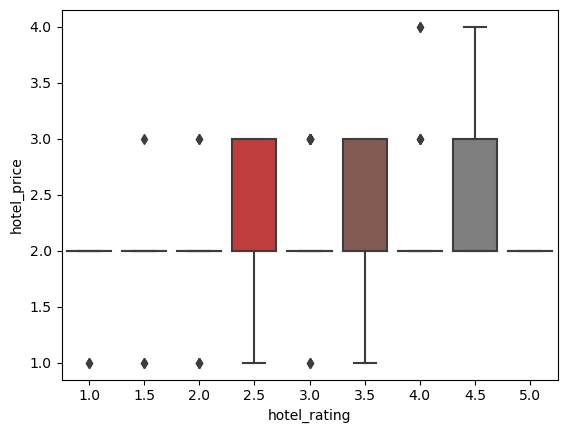

In [9]:
# Boxplot for hotel_rating vs hotel_price
sns.boxplot(x ='hotel_rating', y ='hotel_price',data = df_hotels_POIs)

<Axes: xlabel='hotel_rating', ylabel='mean_poi_rating'>

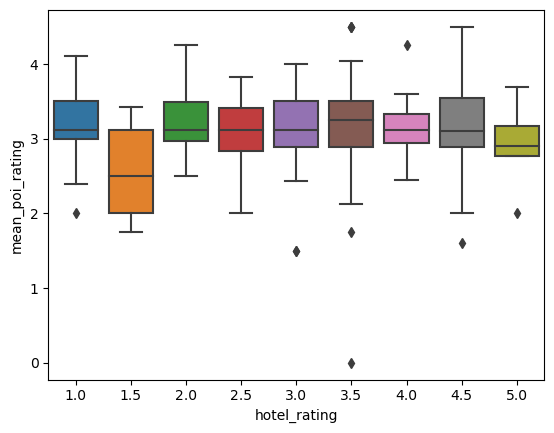

In [10]:
# Boxplot for hotel_rating vs mean_poi_rating
sns.boxplot(x ='hotel_rating', y ='mean_poi_rating',data = df_hotels_POIs)

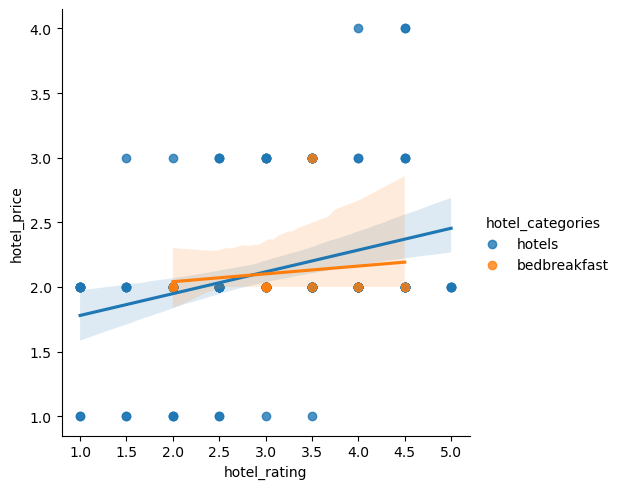

In [11]:
# Filter the DataFrame to include only 'hotels' and 'bedbreakfast' categories
filtered_data = df_hotels_POIs[df_hotels_POIs['hotel_categories'].isin(['hotels', 'bedbreakfast'])]

# Create the lmplot using the filtered data
sns.lmplot(x='hotel_rating', y='hotel_price', hue='hotel_categories', data=filtered_data)